In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("ndtv_data_final.csv")
df = data.copy()

In [3]:
df.info() # data hakkında information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

In [4]:
df.shape #satır sutün sayısı

(1359, 22)

In [5]:
df.head().T #okunabilirlik için transpozunu

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Name,OnePlus 7T Pro McLaren Edition,Realme X2 Pro,iPhone 11 Pro Max,iPhone 11,LG G8X ThinQ
Brand,OnePlus,Realme,Apple,Apple,LG
Model,7T Pro McLaren Edition,X2 Pro,iPhone 11 Pro Max,iPhone 11,G8X ThinQ
Battery capacity (mAh),4085,4000,3969,3110,4000
Screen size (inches),6.67,6.5,6.5,6.1,6.4
Touchscreen,Yes,Yes,Yes,Yes,Yes
Resolution x,1440,1080,1242,828,1080
Resolution y,3120,2400,2688,1792,2340
Processor,8,8,6,6,8


In [6]:
df.isna().values.any() # hiç eksik değer var mı diye sorguluyorum

False

In [7]:
df.isna().sum() # eksik değer var mı diye bu şekilde de sorgulayabiliriz 
#eksik veri olsaydı 3 yöntemden birini seçip kulllanabiliriz
# hepsine 0 atarız 
# eksik verileri sileriz 
# ortalama değerlerle doldururuz # df.fillna(df.mean()) 

Unnamed: 0                0
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64

In [8]:
df.columns # veri setinin sutünlarını adı

Index(['Unnamed: 0', 'Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')

In [9]:
df.describe().T  # verilerin istatiksel bilgilerini veriyor.
#Transpozunu almak satırları daha okunabilir olmasını sağladı

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1359.0,679.000000,392.453819,0.000,339.5,679.0,1018.5,1358.0
Battery capacity (mAh),1359.0,2938.489330,873.514133,1010.000,2300.0,3000.0,3500.0,6000.0
Screen size (inches),1359.0,5.291310,0.671357,2.400,5.0,5.2,5.7,7.3
Resolution x,1359.0,811.543046,270.707271,240.000,720.0,720.0,1080.0,2160.0
Resolution y,1359.0,1490.777778,557.780120,320.000,1280.0,1280.0,1920.0,3840.0
Processor,1359.0,5.551141,2.196562,1.000,4.0,4.0,8.0,10.0
RAM (MB),1359.0,2488.777778,1664.440386,64.000,1000.0,2000.0,3000.0,12000.0
Internal storage (GB),1359.0,30.654864,36.950241,0.064,8.0,16.0,32.0,512.0
Rear camera,1359.0,12.070199,8.948337,0.000,8.0,12.2,13.0,108.0
Front camera,1359.0,7.037969,6.295448,0.000,2.0,5.0,8.0,48.0


In [10]:
df.describe(include=["object"]) # sayısal olmayan verileri sıralıyor 

,Name,Brand,Model,Touchscreen,Operating system,Wi-Fi,Bluetooth,GPS,3G,4G/ LTE
count,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359
unique,1359,76,1321,2,7,2,2,2,2,2
top,OnePlus 7T Pro McLaren Edition,Intex,V5,Yes,Android,Yes,Yes,Yes,Yes,Yes
freq,1,117,4,1342,1299,1351,1344,1251,1214,1012


In [11]:
kategori_df=df.select_dtypes(include=["object"]) # data daki veri tiplerinden object olanları seç kategori_df e ata
kategori_df.head()

,Name,Brand,Model,Touchscreen,Operating system,Wi-Fi,Bluetooth,GPS,3G,4G/ LTE
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,Yes,Android,Yes,Yes,Yes,Yes,Yes
1,Realme X2 Pro,Realme,X2 Pro,Yes,Android,Yes,Yes,Yes,Yes,Yes
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,Yes,iOS,Yes,Yes,Yes,Yes,Yes
3,iPhone 11,Apple,iPhone 11,Yes,iOS,Yes,Yes,Yes,Yes,Yes
4,LG G8X ThinQ,LG,G8X ThinQ,Yes,Android,Yes,Yes,Yes,No,No


# PİE CHART

In [12]:
def pie_visualization(dataframe,column):
    dataframe[column].value_counts().plot.pie(legend=True,autopct="%5.1f%%")

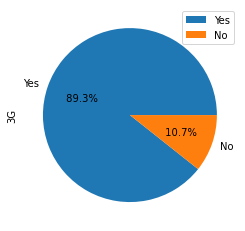

In [13]:
pie_visualization(data,"3G") # telefonlarda 3G oldukça kullanılmış

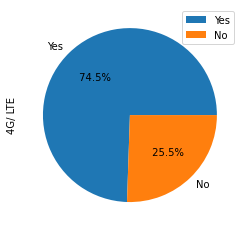

In [14]:
pie_visualization(data,"4G/ LTE") # 4G/LTE de 3G ye göre az kullanılmış 

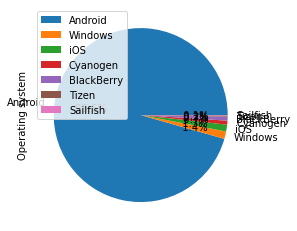

In [15]:
pie_visualization(data,"Operating system") # işletim sistemi olarak android çok fazla kullanılmış

In [16]:
new_system=df["Operating system"] 

In [17]:
#new_system=df["Operating system"]
#new_system.drop_dublicates("Android"))
#new_system.remove("Android")

In [18]:
new_system.head()

0    Android
1    Android
2        iOS
3        iOS
4    Android
Name: Operating system, dtype: object

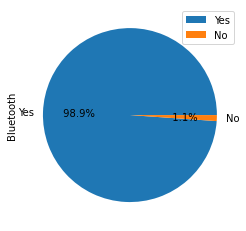

In [19]:
pie_visualization(data,"Bluetooth") # neredeyse bluetooth u olmayan telefon yok

# BAR CHART 

<AxesSubplot:xlabel='3G'>

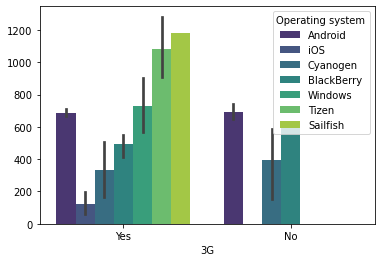

In [20]:
sns.barplot(x='3G' ,y=data.index,hue="Operating system",
            data=df,palette="viridis") 

<AxesSubplot:xlabel='4G/ LTE'>

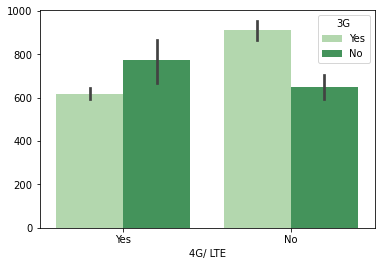

In [21]:
sns.barplot(x="4G/ LTE" ,y=data.index,hue='3G',data=df,palette="Greens") 

<AxesSubplot:xlabel='Operating system', ylabel='Price'>

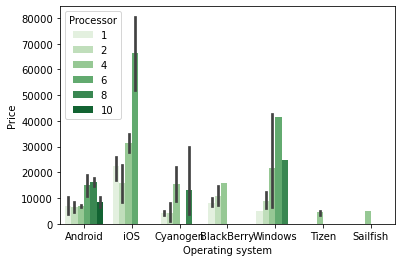

In [22]:
sns.barplot(x="Operating system" ,y="Price",hue="Processor",data=df,palette="Greens") #ios çok pahalı 

<AxesSubplot:xlabel='Operating system'>

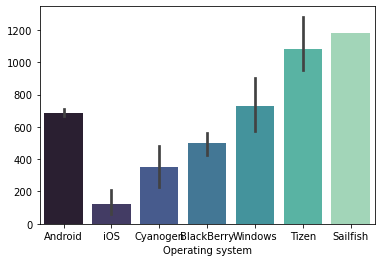

In [23]:
sns.barplot(x='Operating system' ,y=data.index,data=df,palette="mako")

<AxesSubplot:xlabel='Operating system', ylabel='Price'>

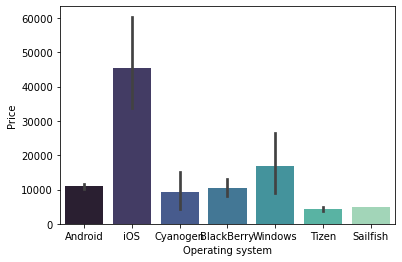

In [24]:
sns.barplot(x='Operating system' ,y="Price",data=df,palette="mako") #işletim sistemi seçiminde fiyat etkili olmuş

<AxesSubplot:xlabel='RAM (MB)', ylabel='Price'>

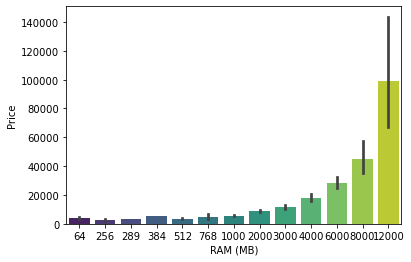

In [25]:
sns.barplot(x='RAM (MB)' ,y="Price",data=df,palette="viridis") # RAM artışıyla birlikte fiyatta artmış güçlü bir ilişki var

<AxesSubplot:xlabel='RAM (MB)', ylabel='Internal storage (GB)'>

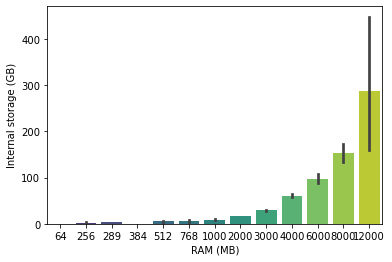

In [26]:
sns.barplot(x='RAM (MB)' ,y="Internal storage (GB)",data=df,palette="viridis") # RAM artışıyla birlikte depolama da genellikle artmış 

#  LİNE PLOT 

<AxesSubplot:xlabel='Front camera', ylabel='RAM (MB)'>

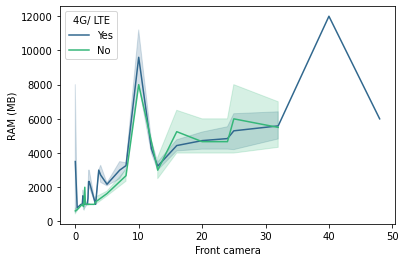

In [27]:
sns.lineplot(data=df, x="Front camera", y="RAM (MB)", hue="4G/ LTE", palette="viridis")

<AxesSubplot:xlabel='Front camera', ylabel='Rear camera'>

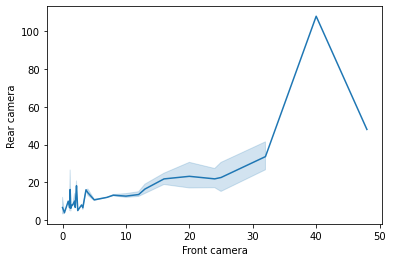

In [28]:
sns.lineplot(data=df, x="Front camera", y="Rear camera", palette="viridis")

<AxesSubplot:xlabel='Resolution x', ylabel='Resolution y'>

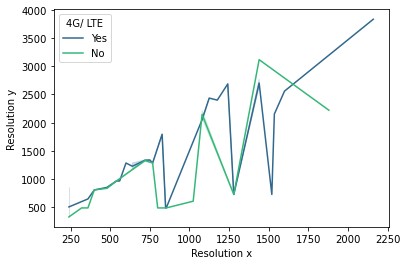

In [29]:
sns.lineplot(data=df, x="Resolution x", y="Resolution y",hue="4G/ LTE", palette="viridis")

<AxesSubplot:xlabel='Front camera', ylabel='Rear camera'>

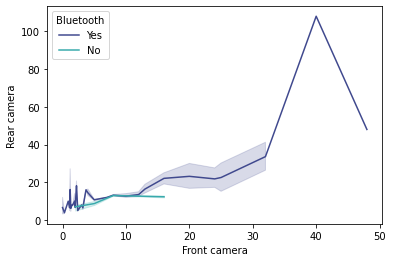

In [30]:
sns.lineplot(data=data, x="Front camera", y="Rear camera", hue="Bluetooth", palette="mako")

<AxesSubplot:xlabel='Battery capacity (mAh)', ylabel='RAM (MB)'>

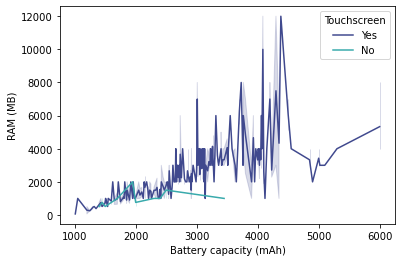

In [31]:
sns.lineplot(data=data, x="Battery capacity (mAh)", y="RAM (MB)", hue="Touchscreen", palette="mako") 
#batarya kapasitesi 3000(mAH)de yukarı ve ram i 2000 MB den yukarı olan telefonlar kesin olarak dokunmatiktir

<AxesSubplot:xlabel='Operating system', ylabel='Price'>

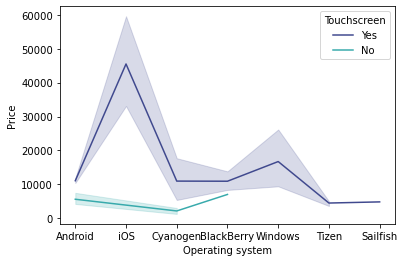

In [32]:
sns.lineplot(data=data, y="Price", x="Operating system", hue="Touchscreen", palette="mako")

<AxesSubplot:xlabel='Operating system', ylabel='Price'>

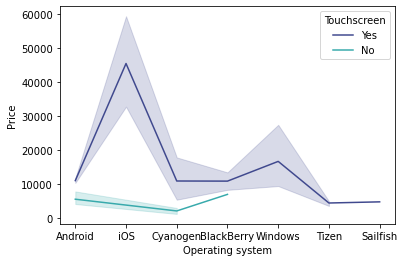

In [33]:
sns.lineplot(data=data, y="Price", x="Operating system", hue="Touchscreen", palette="mako")
#ios tan sonra pahalılık sırasını windows yer alıyor

<AxesSubplot:xlabel='Battery capacity (mAh)', ylabel='Screen size (inches)'>

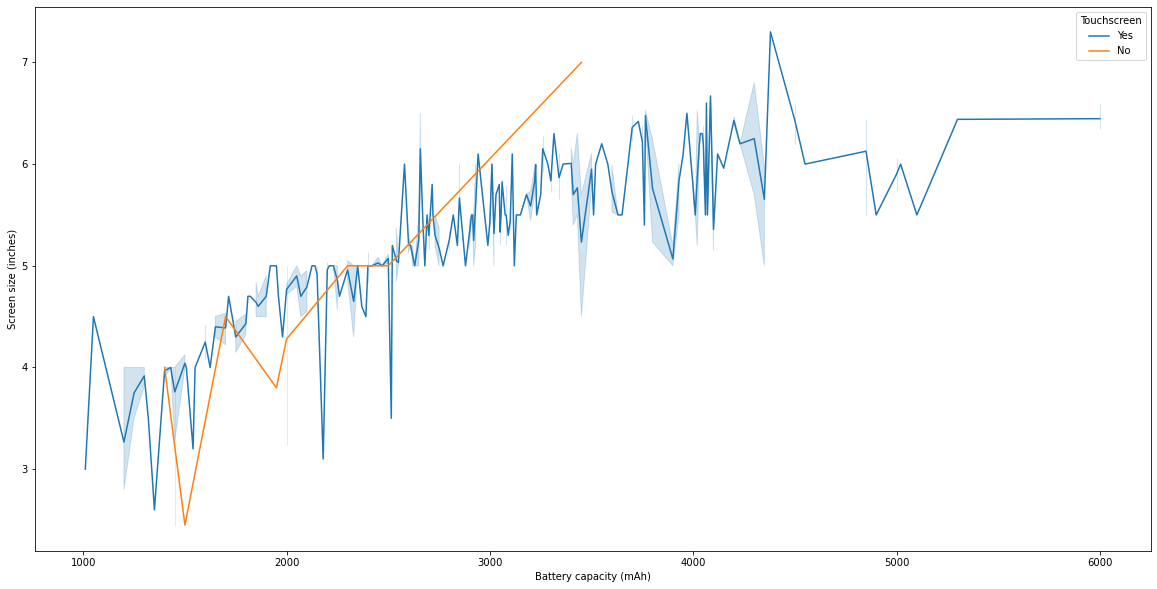

In [34]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "Battery capacity (mAh)", data=df,y = "Screen size (inches)",hue = "Touchscreen")

# HİSTOGRAM 

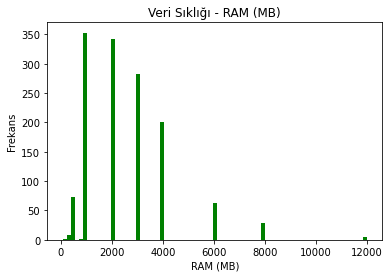

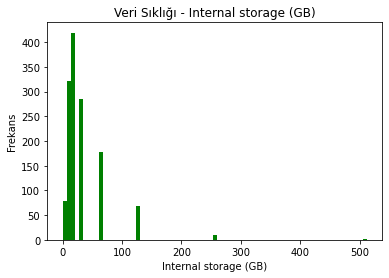

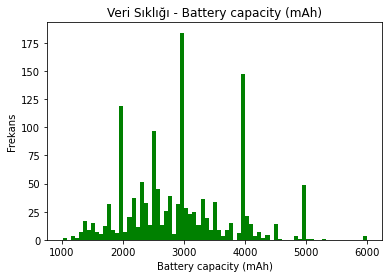

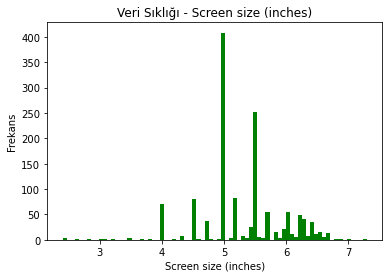

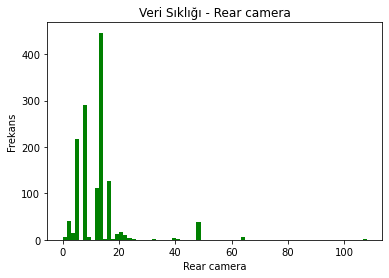

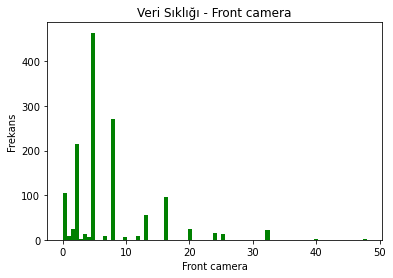

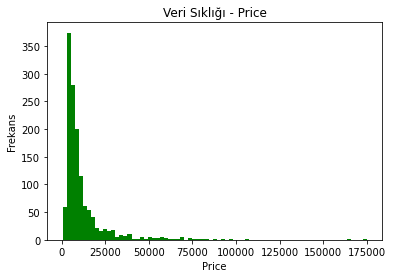

In [35]:
def plotHistogram(degisken):
    """
        Girdi: Değisken / sütun ismi
        Çıktı: İlgili değişkenin histogramı
    """
    plt.figure()
    plt.hist(data[degisken], bins=75, color = "green")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

    
sayisal_degisken = ['RAM (MB)', 'Internal storage (GB)','Battery capacity (mAh)'
                    ,'Screen size (inches)','Rear camera','Front camera','Price']
for i in sayisal_degisken:
    plotHistogram(i)

# 0-25K fiyat aralığında telefon kullanılıyor 25K dan 
# ekranda 5 inç en fazla tercih edilmiş
# ön kameranın 0-10 arasında en çok tercih edilmiştir
# arka kamera 0-20 arasında en çok tercih edilmiştir 
# depolama alanı 2 nin üssü olarak hesaplandığı için 256GB kullanımı 50 den az -takibinde 128 GB -en fazla 0-100 GB aralığında 
  


#  CLUSTERMAP / HEAT MAP

In [36]:
?sns.heatmap  # nasıl kullanılacağı hakkında bilgi verir 

Object `sns.heatmap  # nasıl kullanılacağı hakkında bilgi verir` not found.


' pozif güçlü korelasyon\nön kameranın özelliği artarken arka kamera özelliği de artmış \n'

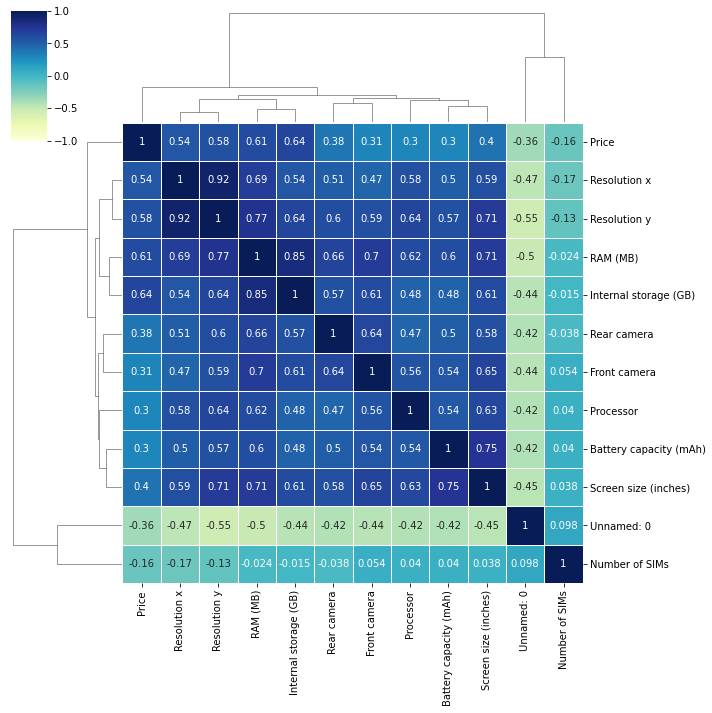

In [37]:
sns.clustermap(df.corr(),annot=True,vmin=-1,vmax=1, linewidths=1,cmap='YlGnBu')

#Resolution x -Resolution y = 0.92
""" pozitif çok güçlü korelayon
çözünürlükler arasında ilişki çok yüksek resolution x artar iken resolution y de artar
"""
#Front camera - Price = 0.31
""" pozitif zayıf korelasyon
ön kamera nın özelliği arttıkça fiyatta artmış diyebiliriz 
"""
#Internal storage (GB)- Number of SIMs = -0.015
"""negatif çok çok zayıf korelasyon
sim sayısıyla depolama alanı arasında nerdeyse ilişki yok
"""
#Battery capacity (mAh)- Internal storage (GB)=0.48
"""pozitif zayıf korelasyon
batarya hafızasının artması ile depolama alanın artması 
"""
#Front camera - Rear camera=0.6
""" pozif güçlü korelasyon
ön kameranın özelliği artarken arka kamera özelliği de artmış 
"""

# CAT PLOT

In [38]:
?sns.catplot

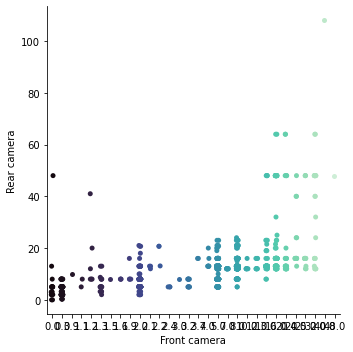

In [39]:
sns.catplot(y="Rear camera",x="Front camera",data=df,palette="mako")

<AxesSubplot:>

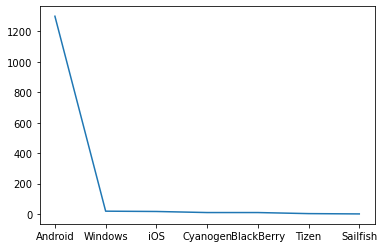

In [40]:
df["Operating system"].value_counts().plot() # en çok android tercih edilmiş

# SCATTER PLOT

In [41]:
apple= data[data.Brand == "Apple"]
xiaomi=data[data.Brand == "Xiaomi"]

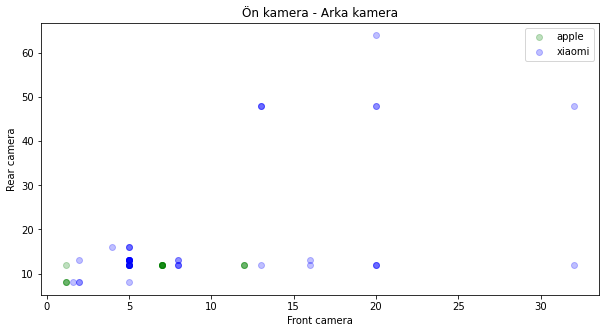

In [42]:
plt.figure(figsize=(10,5))

plt.scatter(apple["Front camera"], apple["Rear camera"], alpha =0.25, label= "apple", color="green")
plt.scatter(xiaomi["Front camera"], xiaomi["Rear camera"], alpha =0.25, label= "xiaomi", color= "blue")

plt.xlabel("Front camera")
plt.ylabel("Rear camera")
plt.title("Ön kamera - Arka kamera")

plt.legend()
plt.show()
# xiomi ön kameranın özelliği arka kameradan daha fazla ama appple da bu oran çok sapmamış  

# BOX PLOT

In [43]:
?sns.boxplot

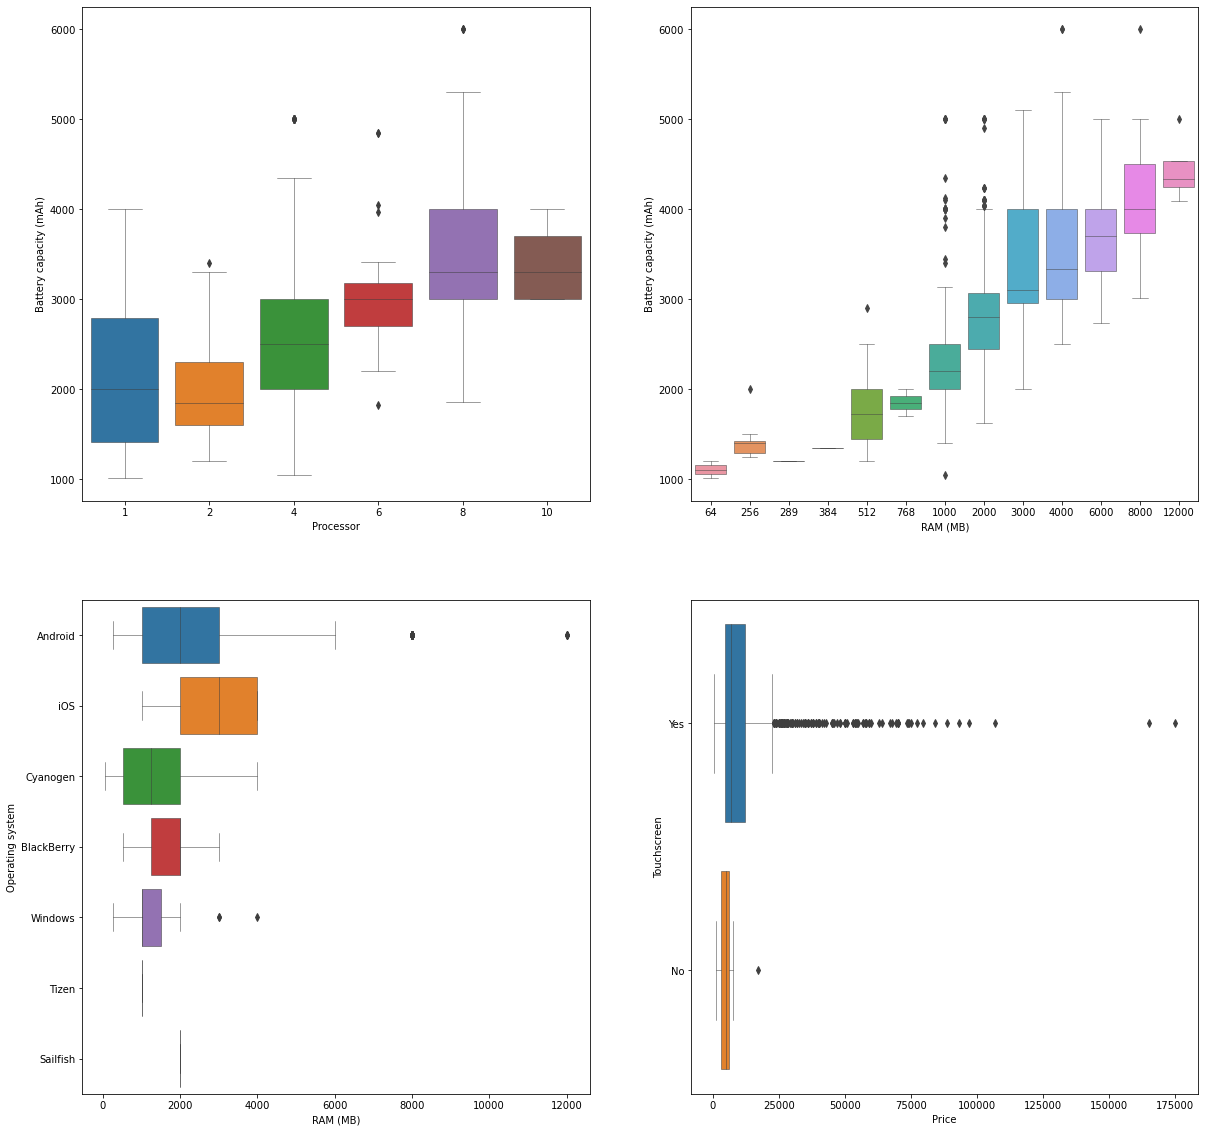

In [44]:
def box_plot(y,x):
    sns.boxplot(x=x, y=y,
                data=df,
                width=0.8,linewidth = 0.5)
              
plt.figure(figsize=(20,20))

plt.subplot(221)
box_plot("Battery capacity (mAh)",'Processor')
#işlemcinin artmasıyla batarya kapasitesi 3000(mAh) de ortalama
#genellikle işlemcinin artmasıyla batarya kapasitesi de artmıştır

plt.subplot(222)
box_plot('Battery capacity (mAh)',"RAM (MB)")

  
plt.subplot(223)
box_plot('Operating system','RAM (MB)')
#ios sistemi diğer sistemlerden RAM i daha fazla

plt.subplot(224)
box_plot('Touchscreen',"Price")
# dokunmatiği olmayan telefon çok az olanlarda ise fiyatlar ortalama 10k 
#25k dan sonra aykırı değerler artıyor
plt.show()


# JOINT PLOT 

In [45]:
?sns.jointplot

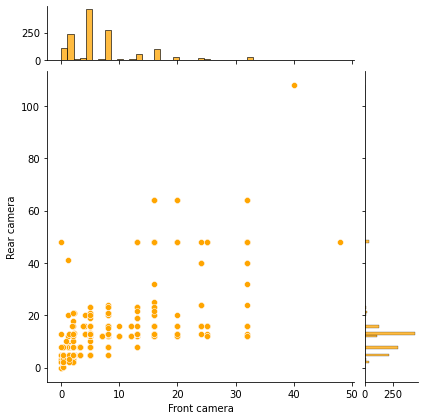

In [46]:
sns.jointplot(data=df, x="Front camera",y="Rear camera",color="Orange",marginal_ticks=True)

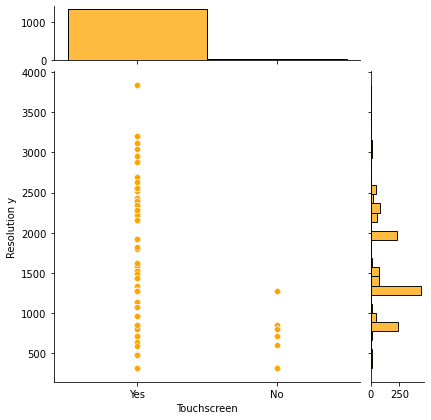

In [47]:
sns.jointplot(data=df, x="Touchscreen",y="Resolution y",color="Orange",marginal_ticks=True) 
#dokunmatiği olmayan telefonlarda ekran çözünürlüğü 2500 den fazla değil

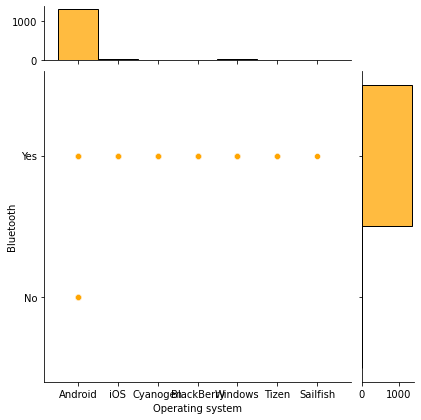

In [48]:
sns.jointplot(data=df, x="Operating system",y="Bluetooth",color="Orange",marginal_ticks=True) 

/Users/sumeyye/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

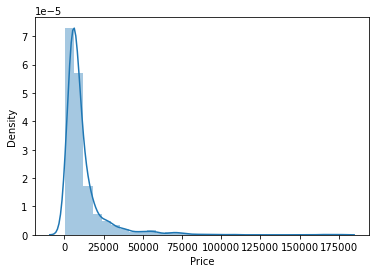

In [49]:
sns.distplot(df.Price,kde=True,bins=30) #fiyat aralığı

# finally

İlk olarak 3G teknolojisi oldukça yaygın kullanıldı, ancak daha sonra 4G/LTE teknolojisi 3G'ye kıyasla daha az kullanılmaya başlandı.
İşletim sistemi tercihleri arasında Android, daha fazla kullanıcıya sahip olurken, iOS tercih edilmeme nedeni olan yüksek fiyatıyla sınırlı bir kitleye hitap ediyor. 
İşletim sistemi pazarında iOS'tan sonra, Windows, pahalı fiyatları nedeniyle daha az tercih ediliyor.
Telefon fiyatları genellikle 0 ile 25 bin arasında olurken,
bluetooth teknolojisi hemen hemen tüm telefonlarda mevcut ve bluetooth özelliğine sahip olmayan telefonlar genellikle Android işletim sistemine sahip oluyor. 
İşlemci gücü arttıkça batarya kapasitesi de artış gösteriyor. RAM artışı ve depolama alanının artışı da fiyatların yükselmesine neden oluyor ve bu özelliklerin artmasıyla birlikte fiyatlar arasında güçlü bir ilişki bulunuyor.
Telefonların dokunmatik ekranlarının olması, batarya kapasitelerinin 3000 mAH'ın üzerinde olması ve RAM'in 2000 MB'den fazla olması kesinlikle bir dokunmatik ekrana sahip olduklarını gösteriyor.
Dokunmatik ekran olmayan telefonlarda ise ekran çözünürlüğü 2500'den fazla değil. Xiaomi marka telefonlar ön kameranın özelliklerinde arka kameradan daha fazla özellik sunarken, Apple marka telefonlarda bu oran çok farklı değil.